# Energy Information Administration EIA and FRED API calls using Python

# The Easy Way to get FED data using FRED and Other Data

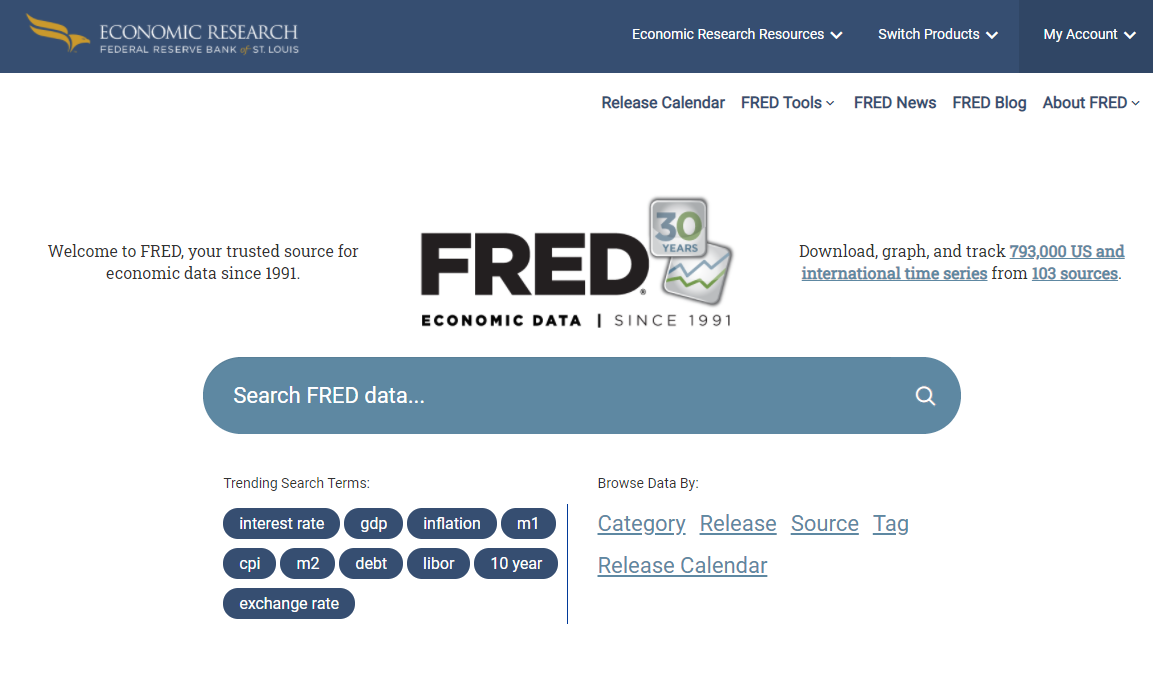

# Pandas Data Reader

SOURCE: https://pandas-datareader.readthedocs.io/en/latest/

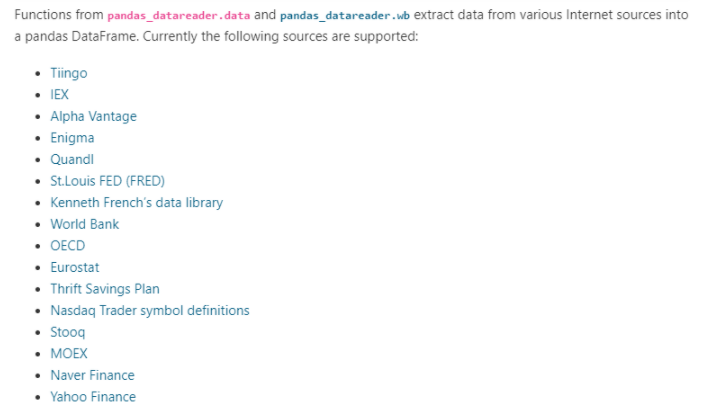

In [1]:
def read_fred(series_id, make_plot = True, show_values = False):
    
    """
    This function simplifies the downloading process for FRED Economic data. 
    It also provides an option to plot the data as well.
    The default series length is five years. 
    
    Parameters
    ----------
    series_id: str
        The id of the data series to be downloaded found by looking it up 
        
    make_plot: bool, 
        True if you want to plot the data, False if you do not. 
        If nothing is selected, then the default value is True.
        
    show_values: bool, default False
        True if you want to display the returning dataframe. 
        If nothing is selected, then the default value is False.   
        
    Returns
    -------
    
    df: Pandas DataFrame object 
        Dataframe of the value of the series with two columns. 
        
    dates: dates in the series (the default FRED series length is 5 years)
    values: values in the series
        
    """
    
    # these are here to note the dependences. It's usually better to keep them outside the funcion. 
    from pandas_datareader import data 
    import datetime as dt
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    
    df = data.DataReader(series_id, 'fred').reset_index()
    df.columns = ['dates', 'values']
    df = df.sort_values(by = 'dates')
    
    # make a plot if selected
    if make_plot:

        plt.style.context('ggplot')
        fig, ax = plt.subplots(figsize = (18,7), dpi = 200)

        fmt = '{x:,.0f}'
        tick = ticker.StrMethodFormatter(fmt)
        ax.yaxis.set_major_formatter(tick) 
        ax.tick_params(axis='y', labelsize = 14)
        ax.tick_params(axis='x', labelsize = 14, rotation = 90)

        ax.set_title(f'\nSeries Plot For:\n\n  {series_id}\n', fontsize = 20)
        ax.set_xlabel('\nDates\n', fontsize = 20)
        ax.set_ylabel('\nValues\n', fontsize = 20)

        ax.scatter(df['dates'], df['values'], facecolors='none', edgecolors='black', linewidth = 2, s = 50, label = 'reported values')
        ax.plot(df['dates'], df['values'], color = 'dodgerblue', linewidth = 1, alpha = 1)

        ax.grid(which = 'major')
        plt.legend(loc = 'best', fontsize = 18)
        plt.show()

    if show_values:
        display(df)
        
    return df


SOURCE: https://fred.stlouisfed.org/series/CPIAUCSL

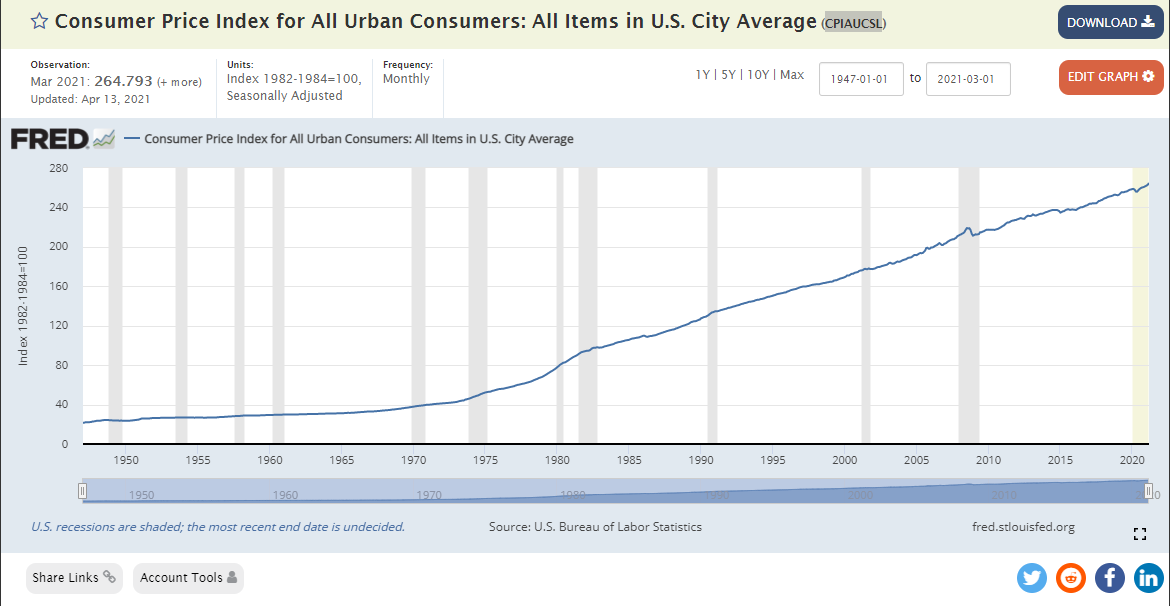

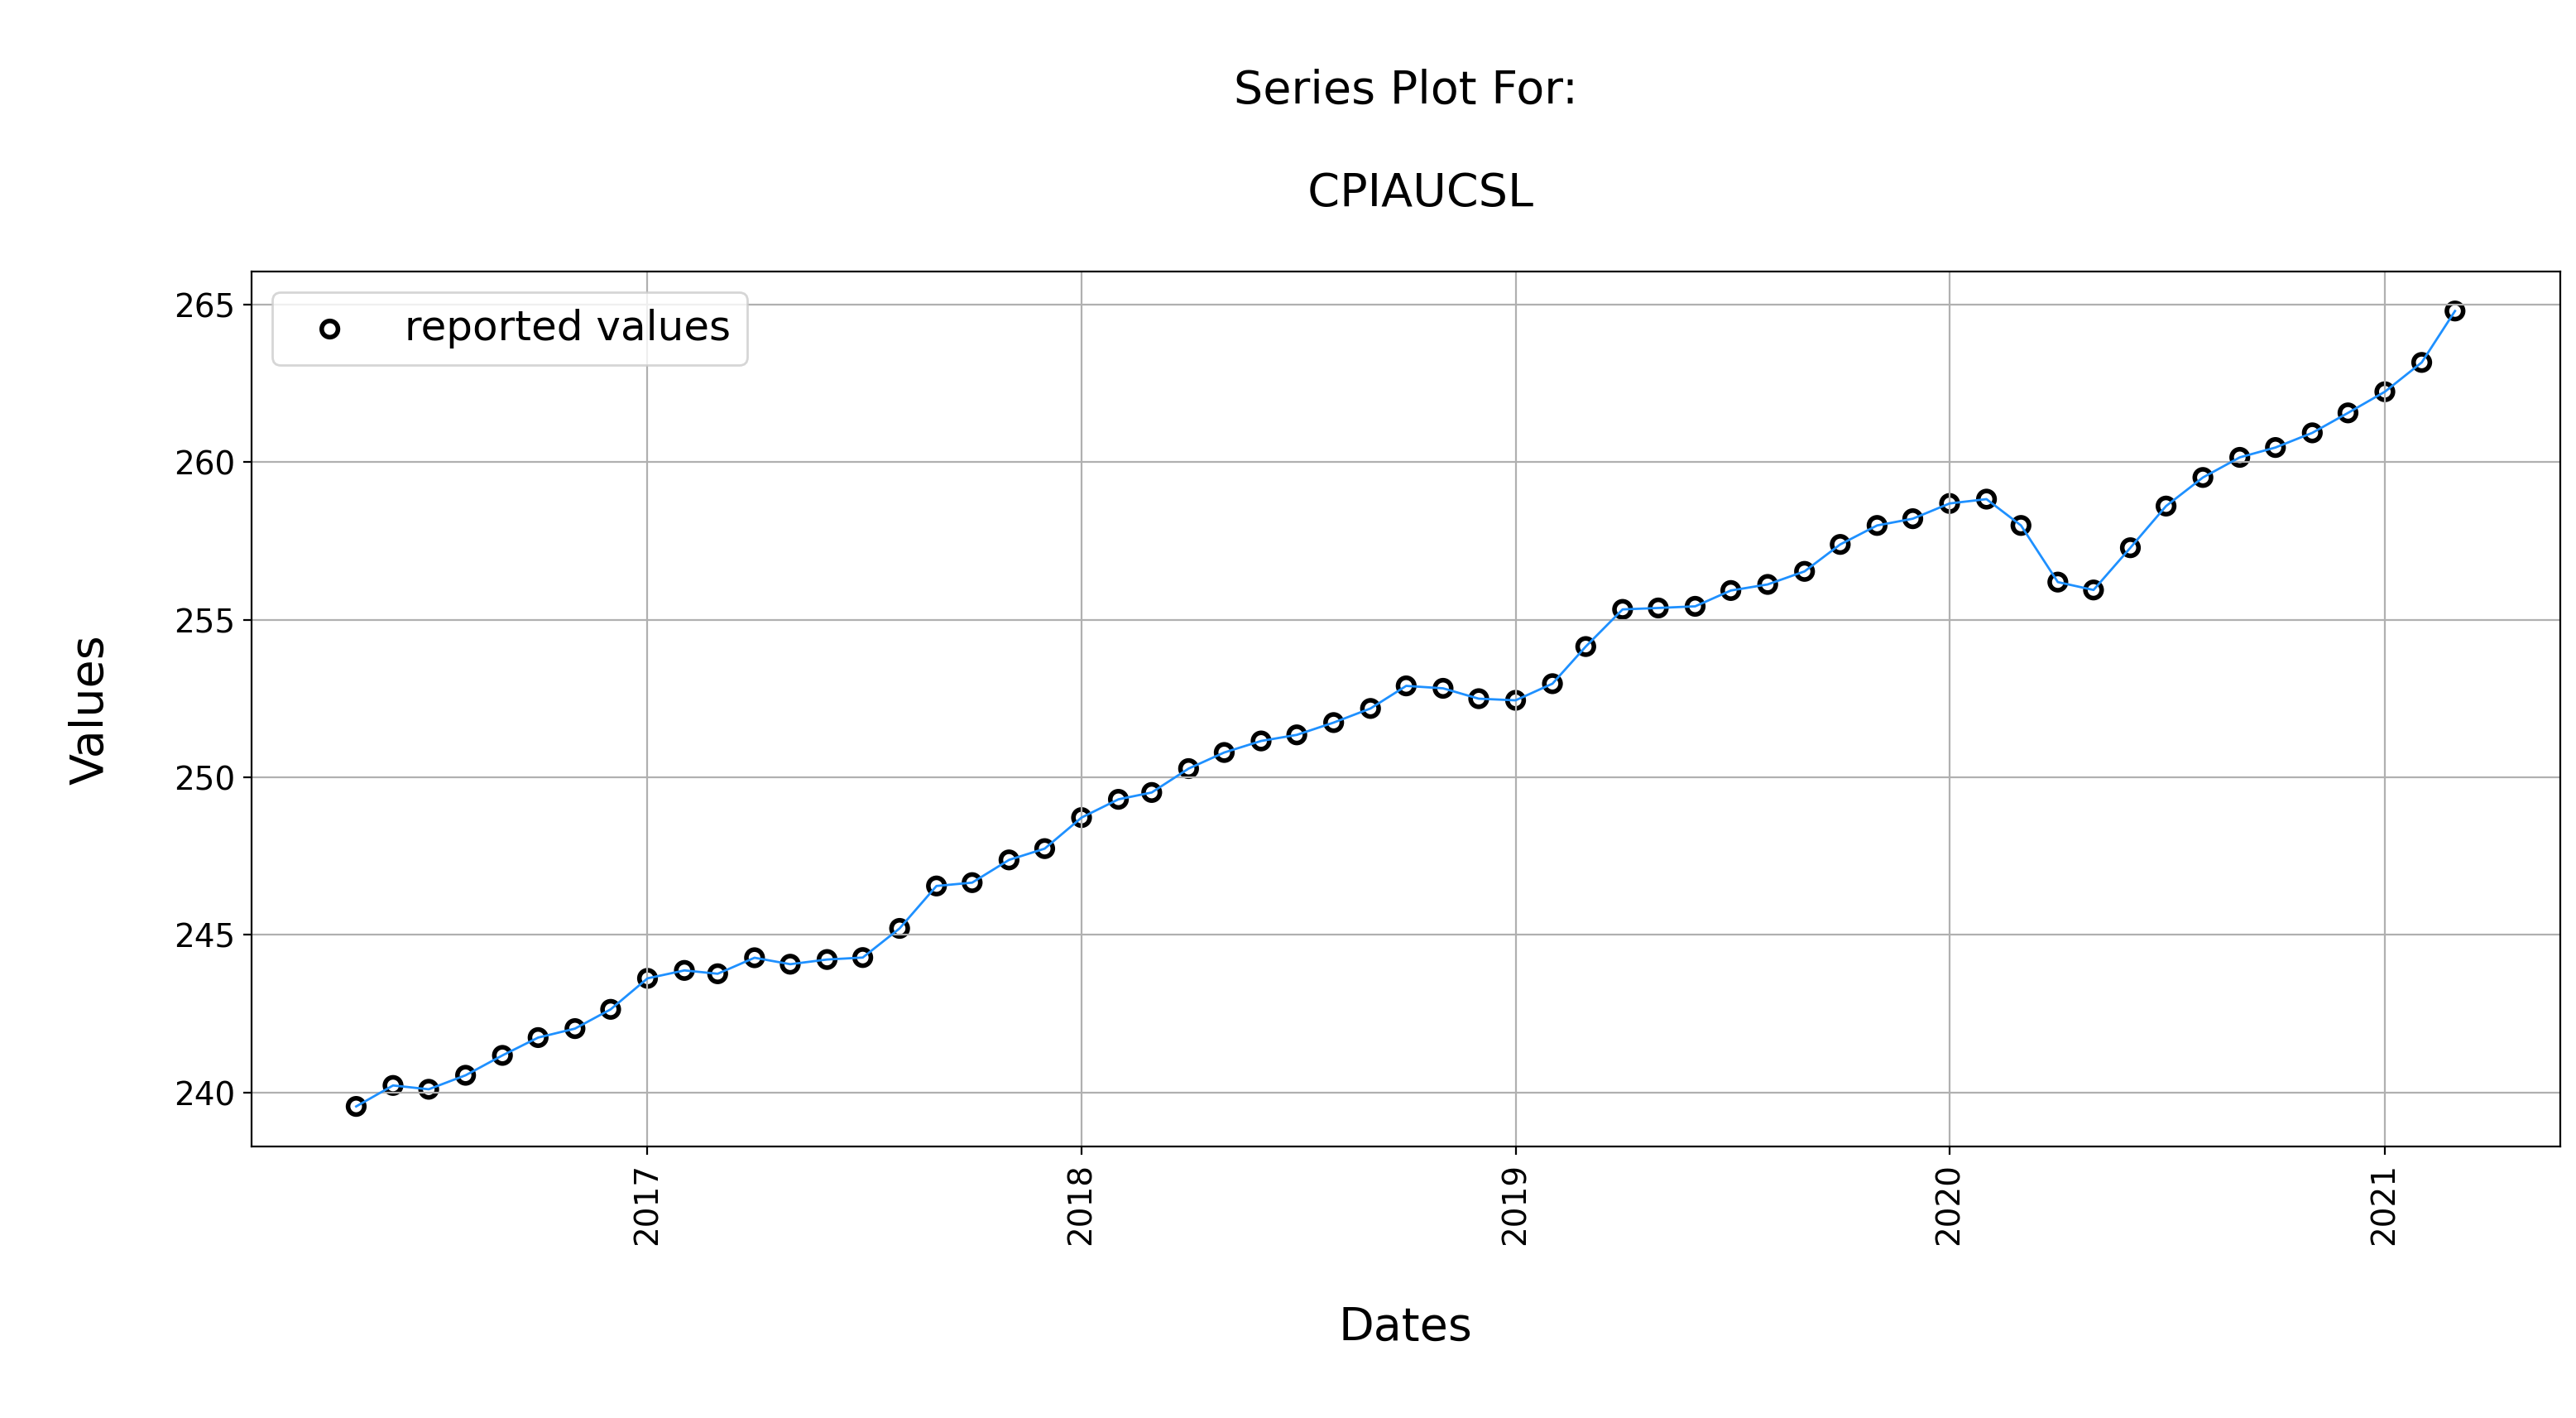

In [2]:
# let's look at teh consumer price index - NOTICE: Default time is 5 years ago. 

series_id = 'CPIAUCSL'
df = read_fred(series_id, make_plot = True)

In [3]:
df.head(20)

,dates,values
0,2016-05-01,239.557
1,2016-06-01,240.222
2,2016-07-01,240.101
3,2016-08-01,240.545
4,2016-09-01,241.176
5,2016-10-01,241.741
6,2016-11-01,242.026
7,2016-12-01,242.637
8,2017-01-01,243.620
9,2017-02-01,243.872


# Calling the EIA API with Python

# Review the Requests library in Python - This is the go-to library for API calls in Python. However if a module or library is available it may be preferable to use that instead to save time. 
SOURCE: https://docs.python-requests.org/en/master/


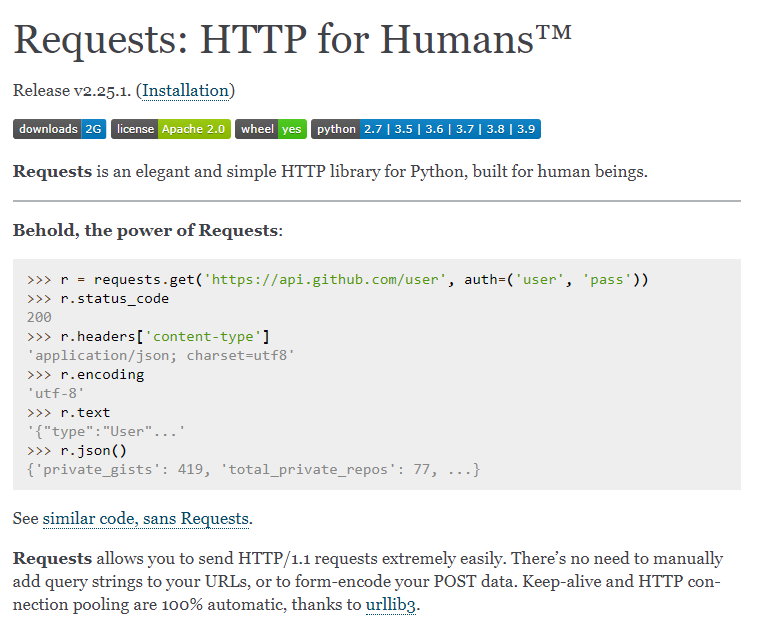

### Browse to this website and select 'Register Now' Then fill out the form. 
https://www.eia.gov/opendata/

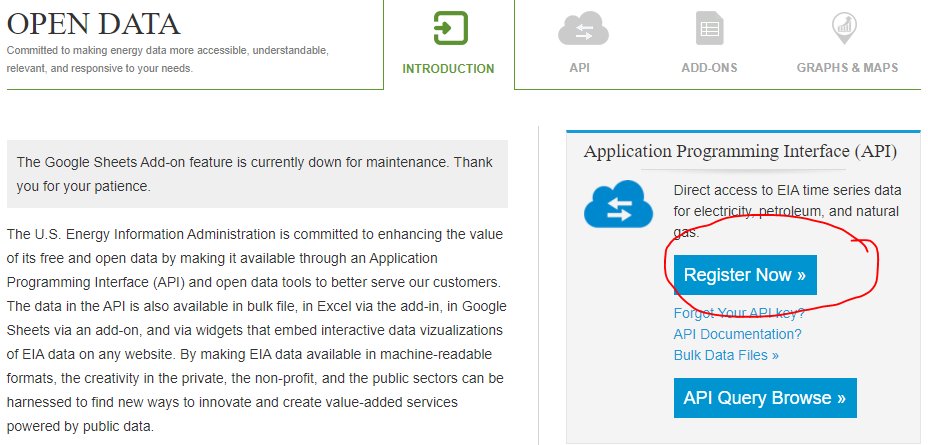

### NOTE YOU WILL GET AN API KEY IN YOUR EMAIL (It also showed up in my Spam folder...)

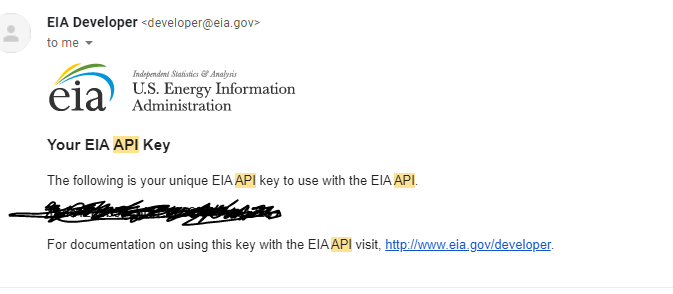

### Select API Query Browse

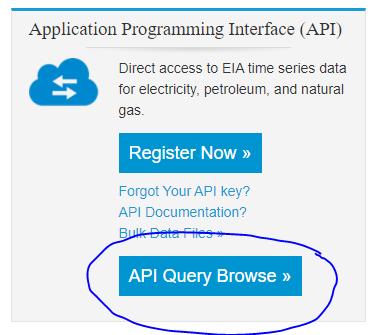

### View the categories and pick an option

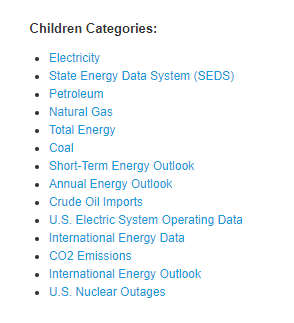

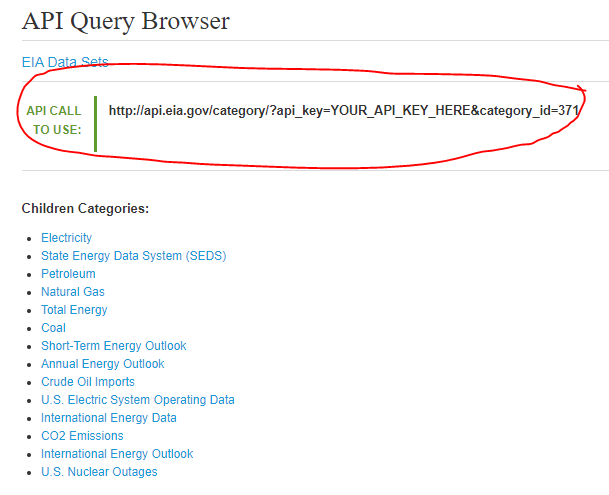

### Select Crude Oil Imports
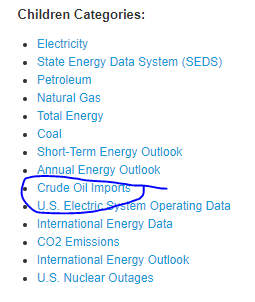

### Pick a category

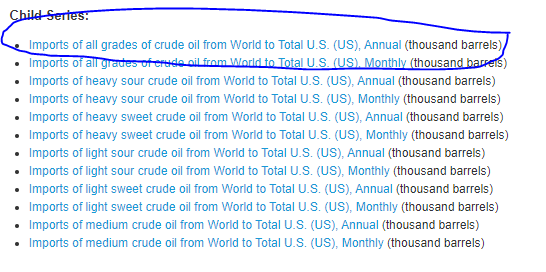

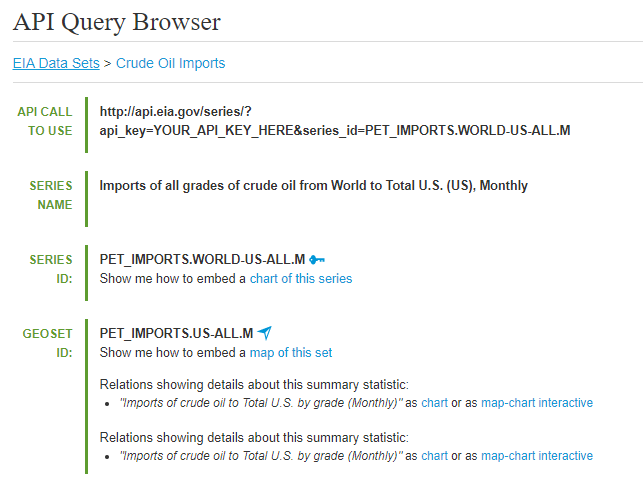

# Function to call the EIA data in Python

In [4]:
def download_eia(series_id, api_key_string, make_plot = True, show_values = False):
    
    """
    This function simplifies the downloading process for EIA data. It also provides an option to plot the data as well.
    
    Parameters
    ----------
    series_id: str
        The id of the data series to be downloaded found by looking it up directions
    
    api_key_string: str
        Required key string provided and emailed to you by the EIA
        
    make_plot: bool, 
        True if you want to plot the data, False if you do not. 
        If nothing is selected, then the default value is True.
        
    show_values: bool, default False
        True if you want to display the returning dataframe. 
        If nothing is selected, then the default value is False.       
    
    Returns
    -------
    
    df: Pandas DataFrame object 
        Dataframe of the value of the series with two columns. 
        
    dates: dates in the series
    values: values in the series
        
    """
    
    # these are here to note the dependences. It's usually better to keep them outside the funcion. 
    import pandas as  pd
    import datetime as dt
    import requests
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    
    fstring_api_call = f'http://api.eia.gov/series/?api_key={api_key_string}&series_id={series_id}'
    data_response = requests.get(fstring_api_call)
    
    if data_response.status_code == 200: 
        pass
    else: 
        print(f'There was an error calling the API: Status code {data_response.status_code}')
        return
        
    json_data = data_response.json()
    my_data = json_data['series'][0]['data']
    df = pd.DataFrame({'dates': [year[0] for year in my_data],'values': [value[1] for value in my_data]}).sort_values('dates')
    df['dates'] = pd.to_datetime(df['dates'])
    
    # reset the index to normalize 
    df = df.reset_index(drop = True)
    
    # make a plot if selected
    if make_plot:

        plt.style.context('ggplot')
        fig, ax = plt.subplots(figsize = (18,7), dpi = 200)

        fmt = '{x:,.0f}'
        tick = ticker.StrMethodFormatter(fmt)
        ax.yaxis.set_major_formatter(tick) 
        ax.tick_params(axis='y', labelsize = 14)
        ax.tick_params(axis='x', labelsize = 14, rotation = 90)

        ax.set_title(f'\nSeries Plot For:\n\n  {series_id}\n', fontsize = 20)
        ax.set_xlabel('\nDates\n', fontsize = 20)
        ax.set_ylabel('\nValues\n', fontsize = 20)

        ax.scatter(df['dates'], df['values'], facecolors='none', edgecolors='black', linewidth = 2, s = 50, label = 'reported values')
        ax.plot(df['dates'], df['values'], color = 'dodgerblue', linewidth = 1, alpha = 1)

        ax.grid(which = 'major')
        plt.legend(loc = 'best', fontsize = 18)
        plt.show()

    return df



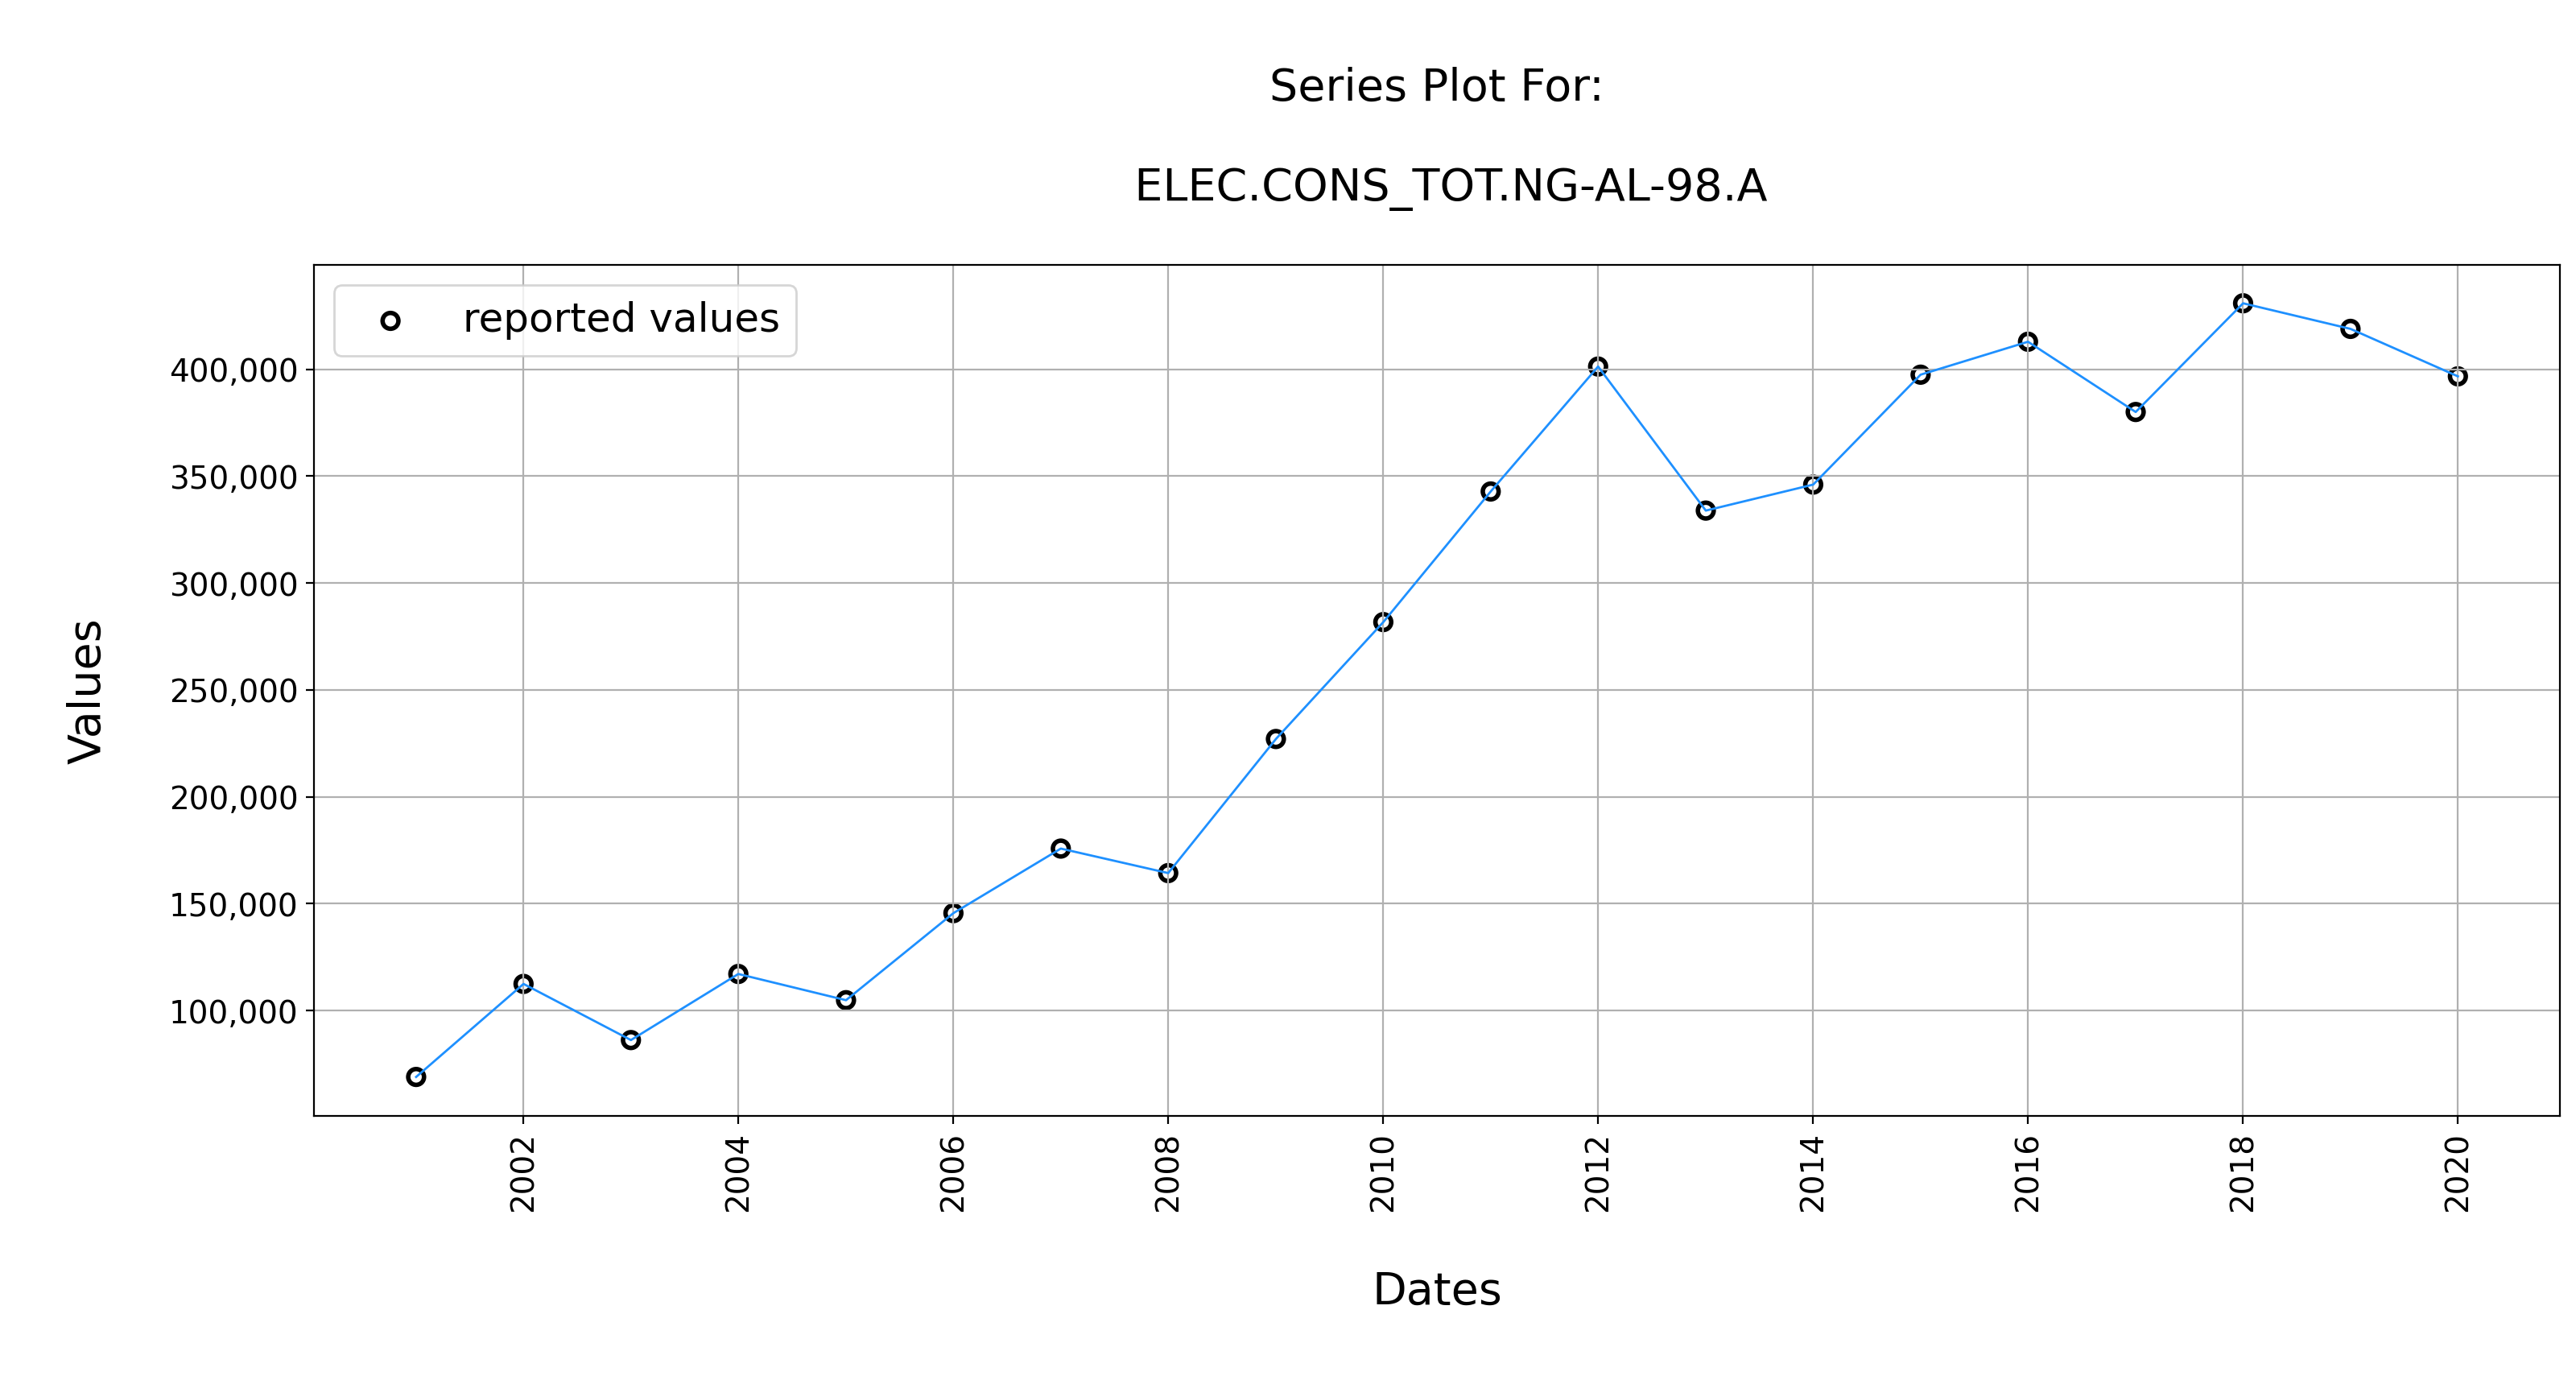

,dates,values
0,2001-01-01,68868.24000
1,2002-01-01,112403.39000
2,2003-01-01,86129.10200
3,2004-01-01,117055.79200
4,2005-01-01,104786.28300
5,2006-01-01,145528.26302
6,2007-01-01,175735.67300
7,2008-01-01,164266.10800
8,2009-01-01,227014.71700
9,2010-01-01,281722.13700


In [5]:
# for presentation purposes, my api key is saved in a .py file 

from my_api import API_KEY
api_key_string = API_KEY

# you should use:
#api_key_string = "PASTE API KEY FROM EMAIL HERE IN QUOTES AND GET UNCOMMENT THIS CODE"

# series - total consumption of natural gas in Alabama for electrical power
series_id = 'ELEC.CONS_TOT.NG-AL-98.A'

df = download_eia(series_id, api_key_string, make_plot = True)
display(df)

# Breaking down the API call.

In [6]:
import pandas as  pd
import numpy as np
import datetime as dt
import requests

from matplotlib import pyplot as plt

In [7]:
# for presentation purposes, my api key is saved in a .py file 

from my_api import API_KEY
api_key_string = API_KEY

# you should use:
#api_key_string = "API KEY FROM EMAIL HERE IN QUOTES"


#### Using f strings in the api call 

Here is a link to a guide to using f strings in Python: http://cis.bentley.edu/sandbox/wp-content/uploads/Documentation-on-f-strings.pdf

In [8]:
# block and copy your API key here
YOUR_API_KEY_HERE = API_KEY

api_call = 'http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=PET_IMPORTS.WORLD-US-ALL.A'

fstring_api_call = f'http://api.eia.gov/series/?api_key={YOUR_API_KEY_HERE}&series_id=PET_IMPORTS.WORLD-US-ALL.A'

# an easier alternative to f strings is to put your api_call_string in inside YOUR_API_KEY_HERE
# api_call = 'http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=PET_IMPORTS.WORLD-US-ALL.A'

### Make the API call

In [9]:
data_response = requests.get(fstring_api_call)

In [10]:
type(data_response)  # you have created a response object 

requests.models.Response

### Use .status_code to get the response code from the object.  A response of 200 is a success, anything else is not

In [11]:
data_response.status_code

200

## For purposes of this lesson - Convert the response to json data using the .jason() method

In [12]:
# returns a dictionary
json_data = data_response.json()
type(json_data)

dict

In [13]:
json_data

{'request': {'command': 'series', 'series_id': 'PET_IMPORTS.WORLD-US-ALL.A'},
 'series': [{'series_id': 'PET_IMPORTS.WORLD-US-ALL.A',
   'name': 'Imports of all grades of crude oil from World to Total U.S. (US), Annual',
   'units': 'thousand barrels',
   'f': 'A',
   'copyright': 'None',
   'source': 'EIA, U.S. Energy Information Administration',
   'geography': 'WLD',
   'geography2': 'USA',
   'start': '2009',
   'end': '2020',
   'updated': '2021-02-26T10:41:48-0500',
   'data': [['2020', 2154267],
    ['2019', 2473322],
    ['2018', 2835046],
    ['2017', 2910118],
    ['2016', 2873086],
    ['2015', 2687409],
    ['2014', 2680326],
    ['2013', 2810724],
    ['2012', 3084957],
    ['2011', 3352601],
    ['2010', 3485068],
    ['2009', 3402467]]}]}

### What is JSON (JavaScript Object Notation)? Learn more about that here....

Guide: https://developers.squarespace.com/what-is-json#:~:text=JSON%2C%20or%20JavaScript%20Object%20Notation,content%20created%20with%20the%20CMS.

In [14]:
# request key
json_data['request']

{'command': 'series', 'series_id': 'PET_IMPORTS.WORLD-US-ALL.A'}

In [15]:
# series key
json_data['series']

[{'series_id': 'PET_IMPORTS.WORLD-US-ALL.A',
  'name': 'Imports of all grades of crude oil from World to Total U.S. (US), Annual',
  'units': 'thousand barrels',
  'f': 'A',
  'copyright': 'None',
  'source': 'EIA, U.S. Energy Information Administration',
  'geography': 'WLD',
  'geography2': 'USA',
  'start': '2009',
  'end': '2020',
  'updated': '2021-02-26T10:41:48-0500',
  'data': [['2020', 2154267],
   ['2019', 2473322],
   ['2018', 2835046],
   ['2017', 2910118],
   ['2016', 2873086],
   ['2015', 2687409],
   ['2014', 2680326],
   ['2013', 2810724],
   ['2012', 3084957],
   ['2011', 3352601],
   ['2010', 3485068],
   ['2009', 3402467]]}]

In [16]:
list_of_stuff = json_data['series']
print(list_of_stuff)

[{'series_id': 'PET_IMPORTS.WORLD-US-ALL.A', 'name': 'Imports of all grades of crude oil from World to Total U.S. (US), Annual', 'units': 'thousand barrels', 'f': 'A', 'copyright': 'None', 'source': 'EIA, U.S. Energy Information Administration', 'geography': 'WLD', 'geography2': 'USA', 'start': '2009', 'end': '2020', 'updated': '2021-02-26T10:41:48-0500', 'data': [['2020', 2154267], ['2019', 2473322], ['2018', 2835046], ['2017', 2910118], ['2016', 2873086], ['2015', 2687409], ['2014', 2680326], ['2013', 2810724], ['2012', 3084957], ['2011', 3352601], ['2010', 3485068], ['2009', 3402467]]}]


In [17]:
dictionary_of_stuff = list_of_stuff[0]
dictionary_of_stuff['data']

[['2020', 2154267],
 ['2019', 2473322],
 ['2018', 2835046],
 ['2017', 2910118],
 ['2016', 2873086],
 ['2015', 2687409],
 ['2014', 2680326],
 ['2013', 2810724],
 ['2012', 3084957],
 ['2011', 3352601],
 ['2010', 3485068],
 ['2009', 3402467]]

In [18]:
my_data = dictionary_of_stuff['data']
my_data

[['2020', 2154267],
 ['2019', 2473322],
 ['2018', 2835046],
 ['2017', 2910118],
 ['2016', 2873086],
 ['2015', 2687409],
 ['2014', 2680326],
 ['2013', 2810724],
 ['2012', 3084957],
 ['2011', 3352601],
 ['2010', 3485068],
 ['2009', 3402467]]

In [19]:
dates = [year[0] for year in my_data]
values = [value[1] for value in my_data]

df = pd.DataFrame({'dates': dates, 'values': values})
df

,dates,values
0,2020,2154267
1,2019,2473322
2,2018,2835046
3,2017,2910118
4,2016,2873086
5,2015,2687409
6,2014,2680326
7,2013,2810724
8,2012,3084957
9,2011,3352601


# All of this code simplified!

In [20]:
import pandas as  pd
import requests

# my api key - you need to furnish your own

from my_api import API_KEY
api_key_string = API_KEY
series_id = 'PET_IMPORTS.WORLD-US-ALL.A'

fstring_api_call = f'http://api.eia.gov/series/?api_key={api_key_string}&series_id={series_id}'
data_response = requests.get(fstring_api_call)
json_data = data_response.json()
my_data = json_data['series'][0]['data']

df = pd.DataFrame({'dates': [year[0] for year in my_data],'values': [value[1] for value in my_data]})

df

,dates,values
0,2020,2154267
1,2019,2473322
2,2018,2835046
3,2017,2910118
4,2016,2873086
5,2015,2687409
6,2014,2680326
7,2013,2810724
8,2012,3084957
9,2011,3352601


In [21]:
df.values

array([['2020', 2154267],
       ['2019', 2473322],
       ['2018', 2835046],
       ['2017', 2910118],
       ['2016', 2873086],
       ['2015', 2687409],
       ['2014', 2680326],
       ['2013', 2810724],
       ['2012', 3084957],
       ['2011', 3352601],
       ['2010', 3485068],
       ['2009', 3402467]], dtype=object)

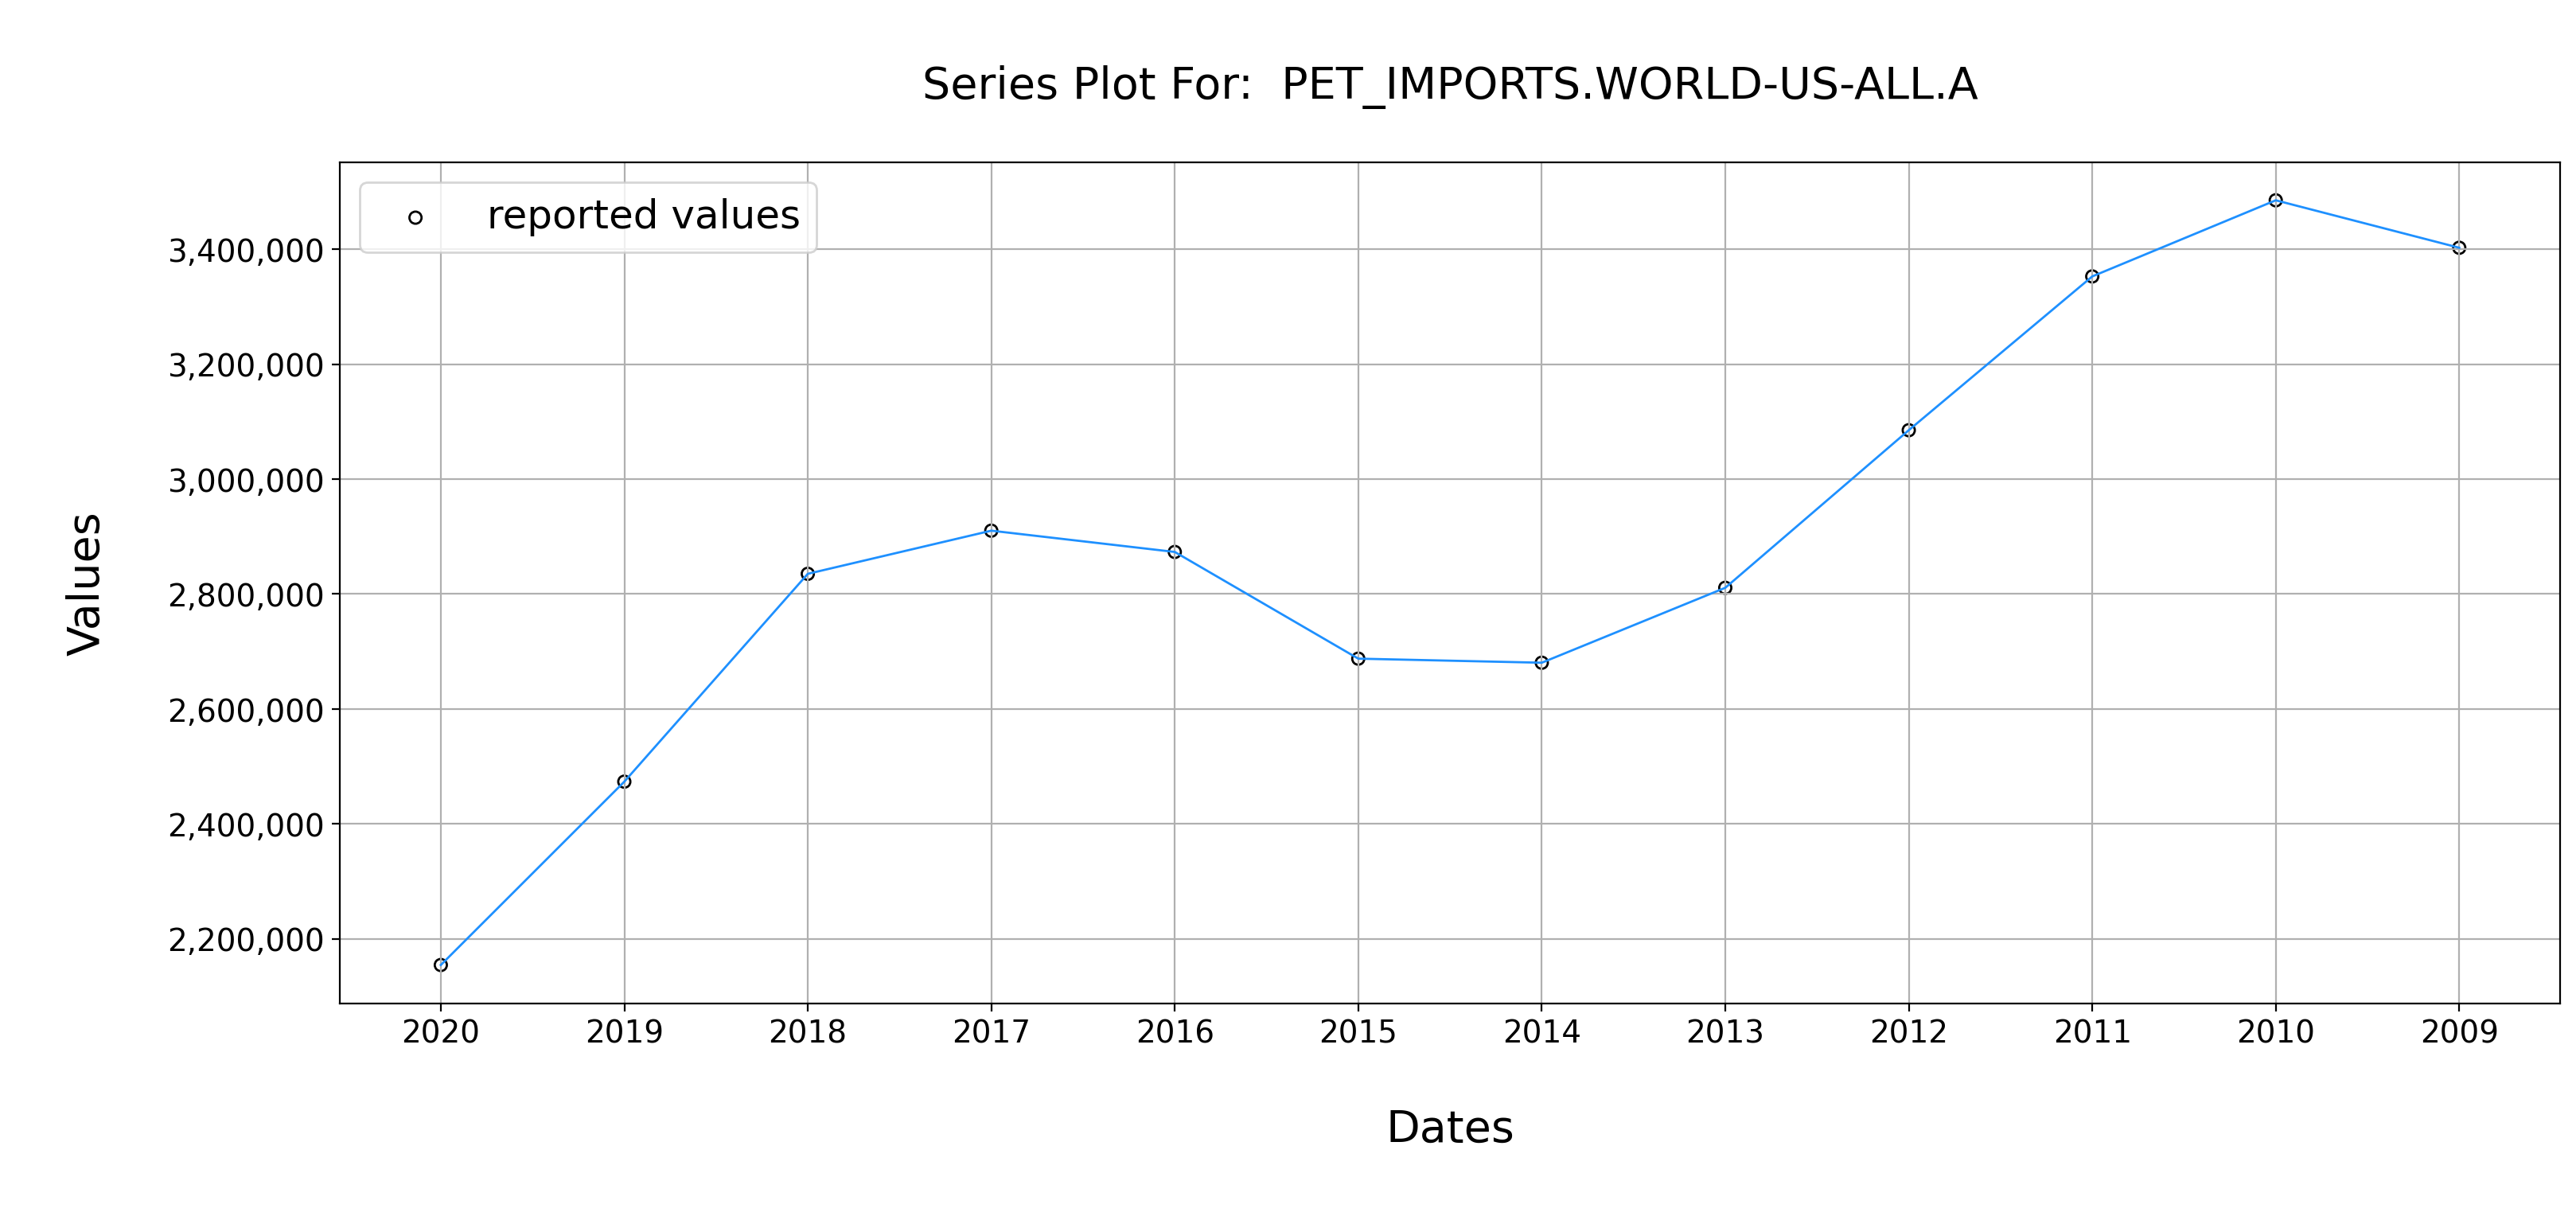

In [22]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker


plt.style.context('ggplot')
fig, ax = plt.subplots(figsize = (18,7), dpi = 200)

fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.tick_params(axis='y', labelsize = 14)
ax.tick_params(axis='x', labelsize = 14)

ax.set_title(f'\nSeries Plot For:  {series_id}\n', fontsize = 20)
ax.set_xlabel('\nDates\n', fontsize = 20)
ax.set_ylabel('\nValues\n', fontsize = 20)

ax.scatter(df['dates'], df['values'], facecolors='none', edgecolors='black', linewidth = 1, s = 30, label = 'reported values')
ax.plot(df['dates'], df['values'], color = 'dodgerblue', linewidth = 1, alpha = 1)

ax.grid(which = 'major')
plt.legend(loc = 2, fontsize = 18)
plt.show()